### Deliverable 1: Preprocessing the Data for a Neural Network

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
#import pandas as pd 
bmi_df = pd.read_csv("clean_dataset.csv")
bmi_df.head()

,patient_no,gender,age,hypertension,heart_disease,smoking_history,have_ever_smoked,bmi,hba1c_level,blood_glucose_level,diabetes
0,1,Female,80.0,f,t,never,False,25.19,6.6,140,f
1,3,Male,28.0,f,f,never,False,27.32,5.7,158,f
2,4,Female,36.0,f,f,current,True,23.45,5.0,155,f
3,5,Male,76.0,t,t,current,True,20.14,4.8,155,f
4,6,Female,20.0,f,f,never,False,27.32,6.6,85,f


In [43]:
bmi_df = application_df.drop(columns=["hba1c_level", "have_ever_smoked"], axis=1)
bmi_df.head()

,patient_no,gender,age,hypertension,heart_disease,smoking_history,bmi,blood_glucose_level,diabetes
0,1,Female,80.0,f,t,never,25.19,140,f
1,3,Male,28.0,f,f,never,27.32,158,f
2,4,Female,36.0,f,f,current,23.45,155,f
3,5,Male,76.0,t,t,current,20.14,155,f
4,6,Female,20.0,f,f,never,27.32,85,f


In [44]:
# Determine the number of unique values in each column.
bmi_df.nunique()

patient_no             64184
gender                     3
age                      101
hypertension               2
heart_disease              2
smoking_history            4
bmi                     3943
blood_glucose_level       18
diabetes                   2
dtype: int64

In [78]:
# Look at bmi value counts for binning
bmi_counts = bmi_df.bmi.value_counts()
bmi_counts

27.32    12047
Other     7484
25.6        83
25.0        82
23.0        79
         ...  
34.71       10
35.98       10
19.17       10
39.71       10
27.59       10
Name: bmi, Length: 1780, dtype: int64

<Axes: ylabel='Density'>

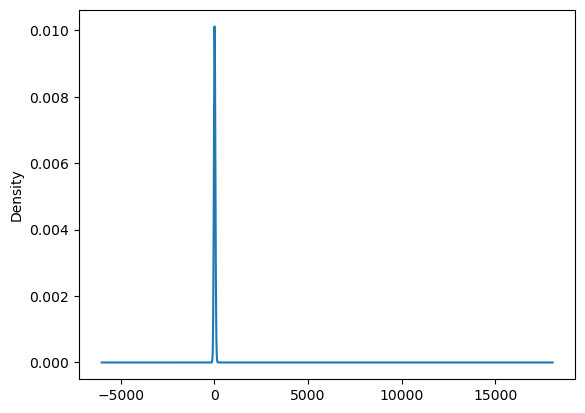

In [46]:
# Visualize the value counts of BMI
bmi_counts.plot.density()

In [47]:
# Determine which values to replace if counts are less than ...?
replace_bmi = list(bmi_counts[bmi_counts < 10].index)

# Replace in dataframe
for app in replace_bmi:
    bmi_df.bmi = bmi_df.bmi.replace(app,"Other")
bmi_df.bmi.value_counts()

27.32    12047
Other     7484
25.6        83
25.0        82
23.0        79
         ...  
34.71       10
35.98       10
19.17       10
39.71       10
27.59       10
Name: bmi, Length: 1780, dtype: int64

In [48]:
# Look at blood_glucose_level value counts for binning
bloodglucose_counts = bmi_df.blood_glucose_level.value_counts()
bloodglucose_counts

140    5026
160    5000
159    4970
130    4957
155    4923
145    4878
126    4878
200    4874
158    4460
80     4435
100    4431
90     4386
85     4275
280     599
300     547
260     526
240     518
220     501
Name: blood_glucose_level, dtype: int64

<Axes: ylabel='Density'>

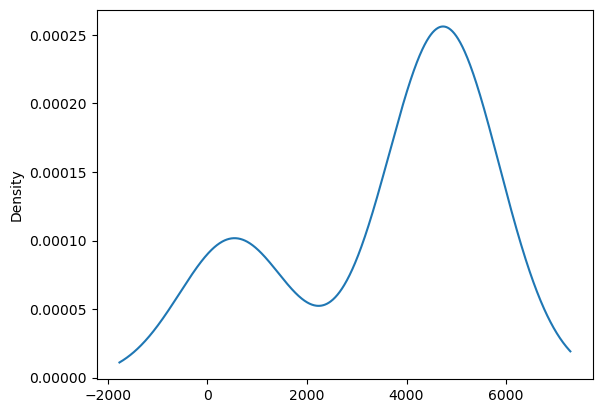

In [49]:
# Visualize the value counts of bloodglucose
bloodglucose_counts.plot.density()

In [50]:
# Determine which values to replace if counts are less than ..?
replace_class = list(bloodglucose_counts[bloodglucose_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    bmi_df.bloodglucose = bmi_df.blood_glucose_level.replace(cls,"Other")
bmi_df.bloodglucose.value_counts()

/var/folders/dl/s3ffv9ld4yv8kqgryvqclgk40000gn/T/ipykernel_56699/2564267899.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bmi_df.bloodglucose = bmi_df.blood_glucose_level.replace(cls,"Other")


140      5026
160      5000
159      4970
130      4957
155      4923
145      4878
126      4878
200      4874
158      4460
80       4435
100      4431
90       4386
85       4275
280       599
300       547
260       526
240       518
Other     501
Name: blood_glucose_level, dtype: int64

In [59]:
bmi_df.describe()

,patient_no,age,blood_glucose_level
count,64184.000000,64184.000000,64184.000000
mean,49915.938692,46.544112,139.628225
std,28887.706887,19.540334,42.165904
min,1.000000,0.160000,80.000000
25%,24868.750000,31.000000,100.000000
50%,49890.500000,47.000000,140.000000
75%,74953.500000,61.000000,159.000000
max,100000.000000,80.000000,300.000000


In [64]:
bmi_df.columns

Index(['patient_no', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [69]:
# Generate our categorical variable lists
bmi_cat = ["patient_no", "gender", "age", "hypertension", "heart_disease", "smoking_history","bmi", "blood_glucose_level", 
                  "diabetes"]

In [80]:
bmi_df.dtypes

patient_no               int64
gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                     object
blood_glucose_level      int64
diabetes                object
dtype: object

In [81]:
# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(bmi_df[bmi_cat]))

# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names(bmi_cat)
#encode_df.head()

In [82]:
# Merge one-hot encoded features and drop the originals
#application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
#application_df.head()

In [83]:
# Split our preprocessed data into our features and target arrays
y = bmi_df.diabetes
X = bmi_df.drop("diabetes", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [87]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Female'

### Deliverable 2: Compile, Train and Evaluate the Model

In [86]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

NameError: name 'X_train_scaled' is not defined

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
nn.save("Diabetes_FP.h5")